In [1]:
import smtf_utility as util
from pinn_magnetic_experimental import DipoleModel



TensorFlow version: 2.15.0


In [14]:
p, v, old_calc = util.parse_mtf(fname="tests\ATMS\Test 5.mtf", scaled=True)

positions, values = util.shuffle_data(p, v)

In [15]:
reg_model = DipoleModel()

In [16]:
reg_model.fit(positions, values, epochs=200)

epoch  0 --- Loss --- 2.1865844e-06
epoch  1 --- Loss --- 2.1381845e-06
epoch  2 --- Loss --- 2.0916289e-06
epoch  3 --- Loss --- 2.0468426e-06
epoch  4 --- Loss --- 2.0037553e-06
epoch  5 --- Loss --- 1.962299e-06
epoch  6 --- Loss --- 1.9224087e-06
epoch  7 --- Loss --- 1.8840225e-06
epoch  8 --- Loss --- 1.8470813e-06
epoch  9 --- Loss --- 1.8115279e-06
epoch  10 --- Loss --- 1.7773084e-06
epoch  11 --- Loss --- 1.7443707e-06
epoch  12 --- Loss --- 1.7126648e-06
epoch  13 --- Loss --- 1.6821434e-06
epoch  14 --- Loss --- 1.6527605e-06
epoch  15 --- Loss --- 1.6244722e-06
epoch  16 --- Loss --- 1.5972367e-06
epoch  17 --- Loss --- 1.5710139e-06
epoch  18 --- Loss --- 1.5457645e-06
epoch  19 --- Loss --- 1.5214518e-06
epoch  20 --- Loss --- 1.4980401e-06
epoch  21 --- Loss --- 1.4754953e-06
epoch  22 --- Loss --- 1.4537845e-06
epoch  23 --- Loss --- 1.4328762e-06
epoch  24 --- Loss --- 1.4127404e-06
epoch  25 --- Loss --- 1.3933479e-06
epoch  26 --- Loss --- 1.3746705e-06
epoch  27 --

In [17]:
print("AI Dipole Vector: ", reg_model.dipole()[-1])
print("AI Dipole Magnitude: ", util.magnitude(reg_model.dipole()[-1]))

AI Dipole Vector:  [0.03402436 0.09046142 1.7996904 ]
AI Dipole Magnitude:  1.8022836452821425


In [18]:
print("Spherical Harmonic Calculation: ", old_calc)
print("Spherical Harmonic Magnitude: ", util.magnitude(old_calc))

Spherical Harmonic Calculation:  [-0.008, -0.106, 1.846]
Spherical Harmonic Magnitude:  1.8490581386208493


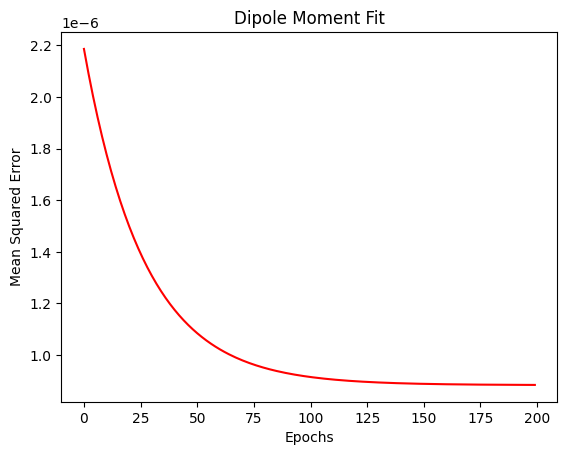

In [19]:
import matplotlib.pyplot as plt


y_axis = reg_model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
#plt.yscale("log")
#plt.xscale("log")
plt.title('Dipole Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

In [72]:
# Example of how to sum parallel layer outputs.
# Must use gradient tape for tracking gradients

import tensorflow as tf
import keras   
from pinn_magnetic import DipoleLayer

total_layers = 3
dlayers = []

#add some layers
for i in range(total_layers):
    dlayers.append(DipoleLayer())

concat_layers = []
#gather predictions
for i in range(total_layers):
    x = dlayers[i]([1, 1, 0])
    print(x)
    concat_layers.append(tf.reshape(x, [1,3]))
 
total_con = keras.layers.concatenate(concat_layers, axis=0)
my_added = tf.reduce_sum(total_con, axis=0, keepdims=True)
my_added = tf.reshape(my_added, [3,])
print("Total:")
print(my_added)







tf.Tensor([-2.9448408e-09 -1.6481989e-09  1.1394311e-09], shape=(3,), dtype=float32)
tf.Tensor([-2.4323492e-09 -1.5088069e-09 -2.3659348e-09], shape=(3,), dtype=float32)
Total:
tf.Tensor([-5.3771902e-09 -3.1570058e-09 -1.2265037e-09], shape=(3,), dtype=float32)
